In [ ]:
pip install pandas


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [22]:
df = pd.read_csv('crime_dataset_india.csv')

In [23]:
df.head()

,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed
0,1,02-01-2020 00:00,01-01-2020 00:00,01-01-2020 01:11,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,NaN
1,2,01-01-2020 19:00,01-01-2020 01:00,01-01-2020 06:26,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No,NaN
2,3,02-01-2020 05:00,01-01-2020 02:00,01-01-2020 14:30,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,NaN
3,4,01-01-2020 05:00,01-01-2020 03:00,01-01-2020 14:46,Pune,170,BURGLARY,49,F,Firearm,Other Crime,1,Yes,29-04-2020 05:00
4,5,01-01-2020 21:00,01-01-2020 04:00,01-01-2020 16:51,Pune,421,VANDALISM,30,F,Other,Other Crime,18,Yes,08-01-2020 21:00


In [24]:
print(df.isnull().sum())

Report Number             0
Date Reported             0
Date of Occurrence        0
Time of Occurrence        0
City                      0
Crime Code                0
Crime Description         0
Victim Age                0
Victim Gender             0
Weapon Used            5790
Crime Domain              0
Police Deployed           0
Case Closed               0
Date Case Closed      20098
dtype: int64


In [25]:
print(df.describe())

       Report Number    Crime Code   Victim Age  Police Deployed
count   40160.000000  40160.000000  40160.00000     40160.000000
mean    20080.500000    349.360259     44.49126        10.006250
std     11593.337742    144.169205     20.22555         5.467951
min         1.000000    100.000000     10.00000         1.000000
25%     10040.750000    225.000000     27.00000         5.000000
50%     20080.500000    349.000000     44.00000        10.000000
75%     30120.250000    474.000000     62.00000        15.000000
max     40160.000000    599.000000     79.00000        19.000000


In [32]:
# Rename Columns
df = df.rename(columns={
    "Date of Occurrence": "Occurrence_Date",
    "Time of Occurrence": "Occurrence_Time",
})


In [36]:
df["Occurrence_Time"] = pd.to_datetime(df["Occurrence_Time"], errors="coerce")

In [37]:
df["Occurrence_Date"] = pd.to_datetime(df["Occurrence_Date"], errors="coerce")

In [38]:
df["Date Reported"] = pd.to_datetime(df["Date Reported"], errors="coerce")

In [39]:
# Replace NaN in 'Date Case Closed
df["Date Case Closed"] = df["Date Case Closed"].fillna("Not Closed")

In [40]:
# Replace invalid negative ages
df["Victim Age"] = df["Victim Age"].apply(lambda x: None if x < 0 else x)

In [42]:
# save Cleaned File
df.to_csv("cleaned_crime_data.csv", index=False)

In [43]:
print("\nTotal Crimes:", len(df))


Total Crimes: 40160


In [46]:
# Crimes by City:
print(df["City"].value_counts())

City
Delhi            5400
Mumbai           4415
Bangalore        3588
Hyderabad        2881
Kolkata          2518
Chennai          2493
Pune             2212
Ahmedabad        1817
Jaipur           1479
Lucknow          1456
Kanpur           1112
Surat            1111
Nagpur           1053
Agra              764
Ludhiana          761
Visakhapatnam     728
Thane             706
Ghaziabad         704
Indore            699
Patna             695
Bhopal            690
Meerut            395
Srinagar          371
Nashik            366
Vasai             362
Varanasi          355
Kalyan            355
Faridabad         354
Rajkot            320
Name: count, dtype: int64


In [47]:
print("\nCrimes by Crime Domain:")
print(df["Crime Domain"].value_counts())


Crimes by Crime Domain:
Crime Domain
Other Crime         22948
Violent Crime       11472
Fire Accident        3825
Traffic Fatality     1915
Name: count, dtype: int64


In [48]:
# Victim Gender Distribution
print(df["Victim Gender"].value_counts())

Victim Gender
F    22423
M    13405
X     4332
Name: count, dtype: int64


In [49]:
# Case Closed Status
print(df["Case Closed"].value_counts())


Case Closed
No     20098
Yes    20062
Name: count, dtype: int64


In [50]:
# Average Victim Age
print(df["Victim Age"].mean())

44.49125996015936


In [51]:
# Weapon Usage
print(df["Weapon Used"].value_counts())

Weapon Used
Knife           5835
Explosives      5751
Blunt Object    5737
Poison          5728
Other           5676
Firearm         5643
Name: count, dtype: int64


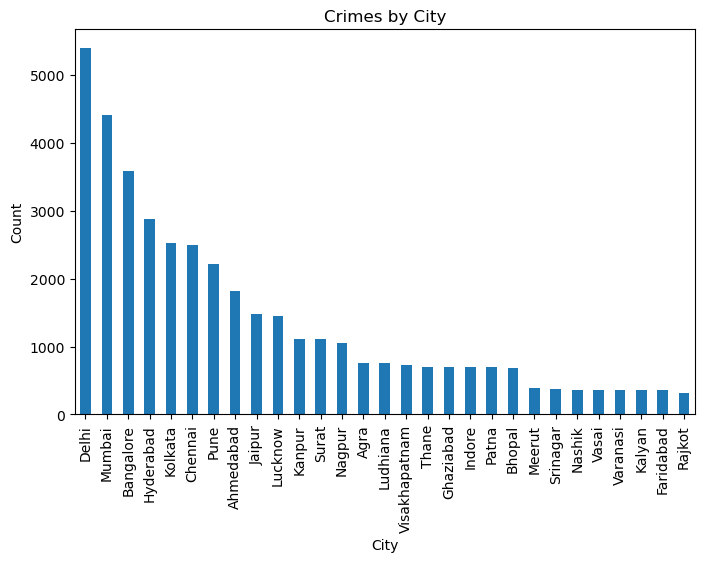

In [52]:
# Crimes By City
df["City"].value_counts().plot(kind="bar", figsize=(8, 5))
plt.title("Crimes by City")
plt.xlabel("City")
plt.ylabel("Count")
plt.show()

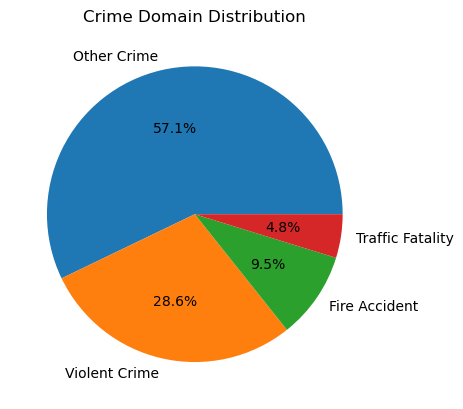

In [53]:
# Crime Domain Distributaion
df["Crime Domain"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("Crime Domain Distribution")
plt.ylabel("")  # Hide label
plt.show()

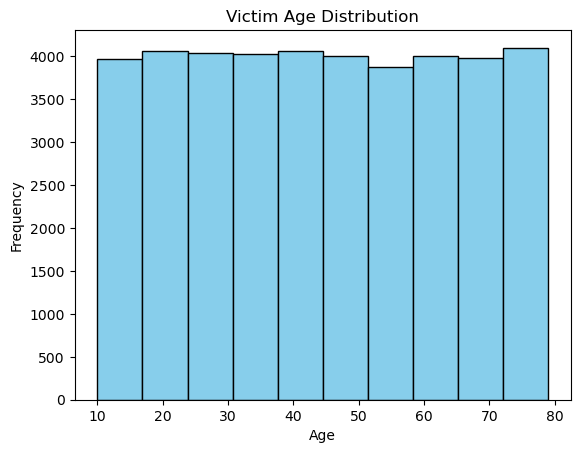

In [58]:
df["Victim Age"].dropna().plot(
    kind="hist",
    bins=10,
    color="skyblue",     
    edgecolor="black"    
)

plt.title("Victim Age Distribution")
plt.xlabel("Age")
plt.show()


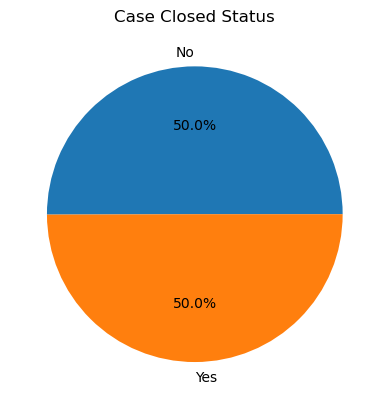

In [61]:
#Case Closed Pie Chart
df["Case Closed"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("Case Closed Status")
plt.ylabel("")
plt.show()

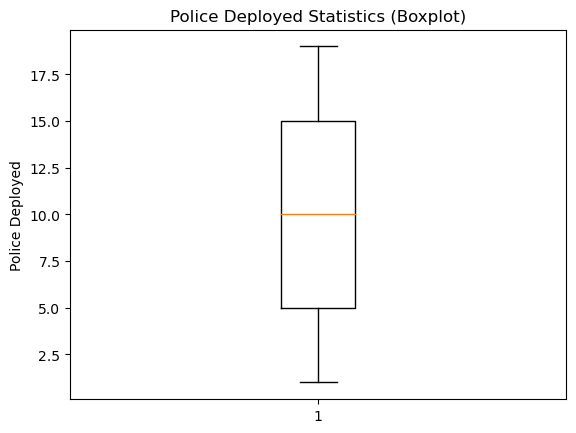

In [62]:
plt.boxplot(df["Police Deployed"].dropna())

plt.title("Police Deployed Statistics (Boxplot)")
plt.ylabel("Police Deployed")
plt.show()


In [63]:
weapon_domain = df.groupby(["Crime Domain", "Weapon Used"]).size().reset_index(name="Count")
print(weapon_domain)


        Crime Domain   Weapon Used  Count
0      Fire Accident  Blunt Object    533
1      Fire Accident    Explosives    546
2      Fire Accident       Firearm    519
3      Fire Accident         Knife    575
4      Fire Accident         Other    552
5      Fire Accident        Poison    547
6        Other Crime  Blunt Object   3305
7        Other Crime    Explosives   3275
8        Other Crime       Firearm   3211
9        Other Crime         Knife   3410
10       Other Crime         Other   3253
11       Other Crime        Poison   3274
12  Traffic Fatality  Blunt Object    279
13  Traffic Fatality    Explosives    286
14  Traffic Fatality       Firearm    253
15  Traffic Fatality         Knife    294
16  Traffic Fatality         Other    252
17  Traffic Fatality        Poison    287
18     Violent Crime  Blunt Object   1620
19     Violent Crime    Explosives   1644
20     Violent Crime       Firearm   1660
21     Violent Crime         Knife   1556
22     Violent Crime         Other

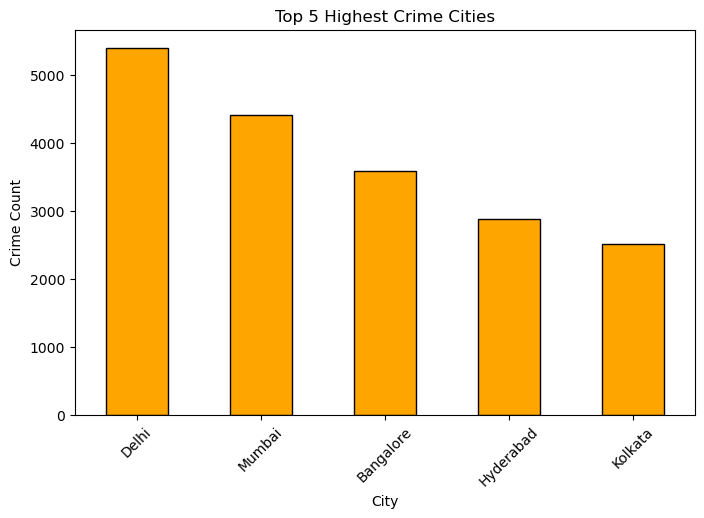

In [65]:
# Top 5 Highest Crime Cities
df["City"].value_counts().head(5).plot(
    kind="bar",
    figsize=(8,5),
    color="orange",
    edgecolor="black"
)

plt.title("Top 5 Highest Crime Cities")
plt.xlabel("City")
plt.ylabel("Crime Count")
plt.xticks(rotation=45)
plt.show()


In [66]:
df["Month"] = df["Date Reported"].dt.to_period("M")

monthly_crime = df.groupby(["City", "Month"]).size().reset_index(name="Crime_Count")
print(monthly_crime.head())


   City    Month  Crime_Count
0  Agra  2020-01            6
1  Agra  2020-02            4
2  Agra  2020-03            8
3  Agra  2020-04            4
4  Agra  2020-05            3
